# Dubins Monte-Carlo simulations



In [1]:
# If first time running this code on a personal computer
# using Pkg
# Pkg.instantiate()

### Script / SCP Initialization

In [2]:
# Initializing script
using LinearAlgebra
using Ipopt
using JuMP
using NLsolve

include("./Models/dubins_free.jl")
include("./SCP/scp_problem.jl")
include("./SCP/scp_alg.jl")
include("./utils/dubins_plotting.jl")

# Number of time-discretization points and maximum number of SCP iterations
N, max_it = 51, 50

(51, 50)

In [3]:
# Defining the model, the initial strategy and each convex subproblem
N_MC                 = 100
model                = DubinsFree()
x0_MC, xf_MC, obs_MC, tfs = get_randomized_conditions(model, N_MC=N_MC, NB_obs=2)
print("Initialized problems")

Initialized problems

In [16]:
B_shooting = false

false

In [17]:
X_MC,U_MC,P0_MC         = [],[],[]
succ_MC,it_MC,tr_sat_MC = [],[],[]
times_MC                = []

conv_threshold = model.convergence_threshold

0.001

In [18]:
include("./Models/dubins_free.jl")
include("./SCP/scp_alg.jl")
include("./SCP/scp_problem.jl")

for i = 1:N_MC
    println("Problem i=$i / $N_MC")
    
    model                       = DubinsFree()
    model.convergence_threshold = conv_threshold

    model.x_init    = x0_MC[i,:]
    model.x_final   = xf_MC[i,:]
    model.obstacles = obs_MC[i]
    model.tf_guess  = tfs[i]

    Xp,Up   = initialize_trajectory(model,N)
    problem = SCPProblem(model,N,Xp,Up)
    
    start_time = time()
    (X_all,U_all,P0_all, succ,it,tr_sat) = solve_scp(model, problem, N, max_it; 
                                                     B_shooting=B_shooting, verbose=false)
    elapsed = time()-start_time

    push!(X_MC,      X_all)
    push!(U_MC,      U_all)
    push!(P0_MC,     P0_all)
    push!(succ_MC,   succ)
    push!(it_MC,     it)
    push!(tr_sat_MC, tr_sat)
    push!(times_MC,  elapsed)
end
print("done")

Problem i=1 / 100
Problem i=2 / 100
Problem i=3 / 100
Problem i=4 / 100
Problem i=5 / 100
Problem i=6 / 100
Problem i=7 / 100
Problem i=8 / 100
Problem i=9 / 100
Problem i=10 / 100
Problem i=11 / 100
Problem i=12 / 100
Problem i=13 / 100
Problem i=14 / 100
Problem i=15 / 100
Problem i=16 / 100
Problem i=17 / 100
Problem i=18 / 100
Problem i=19 / 100
Problem i=20 / 100
Problem i=21 / 100
Problem i=22 / 100
Problem i=23 / 100
Problem i=24 / 100
Problem i=25 / 100
Problem i=26 / 100
Problem i=27 / 100
Problem i=28 / 100
Problem i=29 / 100
Problem i=30 / 100
Problem i=31 / 100
Problem i=32 / 100
Problem i=33 / 100
Problem i=34 / 100
Problem i=35 / 100
Problem i=36 / 100
Problem i=37 / 100
Problem i=38 / 100
Problem i=39 / 100
Problem i=40 / 100
Problem i=41 / 100
Problem i=42 / 100
Problem i=43 / 100
Problem i=44 / 100
Problem i=45 / 100
Problem i=46 / 100
Problem i=47 / 100
Problem i=48 / 100
Problem i=49 / 100
Problem i=50 / 100
Problem i=51 / 100
Problem i=52 / 100
Problem i=53 / 100
Pr

In [19]:
findall(succ_MC.==false)

0-element Array{Int64,1}

In [20]:
findall(tr_sat_MC.==false)

0-element Array{Int64,1}

In [21]:
if B_shooting
    X_MC_shooting      = copy(X_MC)
    U_MC_shooting      = copy(U_MC)
    P0_MC_shooting     = copy(P0_MC)
    succ_MC_shooting   = copy(succ_MC)
    it_MC_shooting     = copy(it_MC)
    tr_sat_MC_shooting = copy(tr_sat_MC)
    times_MC_shooting  = copy(times_MC)
else
    X_MC_scpOnly      = copy(X_MC)
    U_MC_scpOnly      = copy(U_MC)
    P0_MC_scpOnly     = copy(P0_MC)
    succ_MC_scpOnly   = copy(succ_MC)
    it_MC_scpOnly     = copy(it_MC)
    tr_sat_MC_scpOnly = copy(tr_sat_MC)
    times_MC_scpOnly  = copy(times_MC)
end
print("done")

done

### SCP only

In [22]:
println("Success: $(sum(succ_MC_scpOnly)) / $N_MC")
println("Nb. itr: mean=$(mean(it_MC_scpOnly)), std=$(std(it_MC_scpOnly)), 95% conf: $(3*std(it_MC_scpOnly))\n")

Success: 100 / 100
Nb. itr: mean=8.0, std=4.647145316854164, 95% conf: 13.941435950562493



### SCP+Shooting

In [23]:
# it_MC_success = it_MC_scpOnly[findall(succ_MC)]
println("Success: $(sum(succ_MC_shooting)) / $N_MC")
println("Nb. itr: mean=$(mean(it_MC_shooting)), std=$(std(it_MC_shooting)), 95% conf: $(3*std(it_MC_shooting))\n")

Success: 100 / 100
Nb. itr: mean=5.69, std=4.430598381731525, 95% conf: 13.291795145194577



### Plot

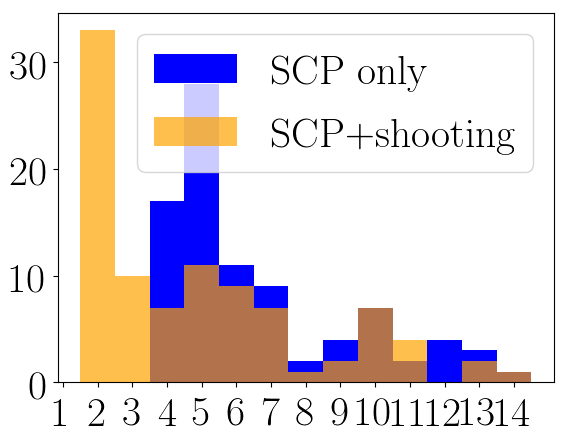

PyObject <matplotlib.legend.Legend object at 0x7f13e8188cc0>

In [24]:
n_bins = 100
bins_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14] .+ 0.5
plt.hist(it_MC_scpOnly, bins_vals, label="SCP only", color="blue")
plt.hist(it_MC_shooting,   bins_vals, label="SCP+shooting", alpha=0.7, color="orange")

bins_vals_ticks = bins_vals .- 0.5
plt.xticks(bins_vals_ticks)
# plt.grid()
plt.legend()

## PLOTTING

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = plt_solutions(::SCPProblem, ::DubinsFree, ::Array{Any,1}, ::Array{Any,1}; xlims::Array{Float64,1}, ylims::Array{Float64,1}, figsize::Array{Int64,1}, B_plot_labels::Bool) at dubins_plotting.jl:68
└ @ Main /home/thomas/Documents/research/TAC_GuSTO/utils/dubins_plotting.jl:68


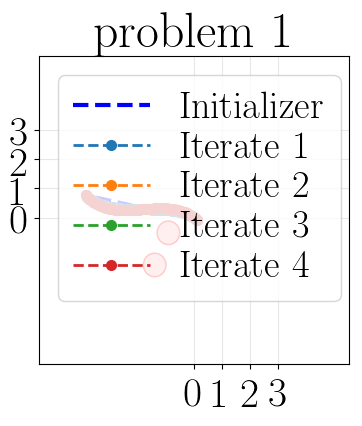

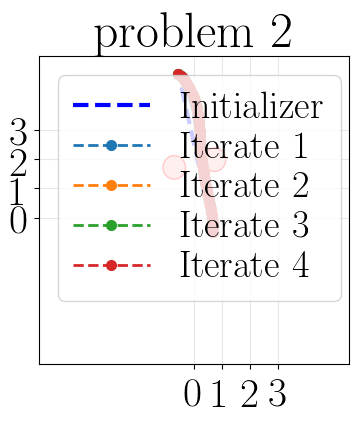

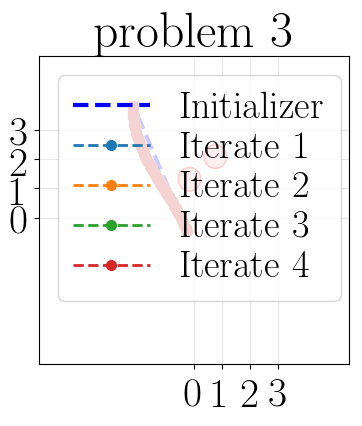

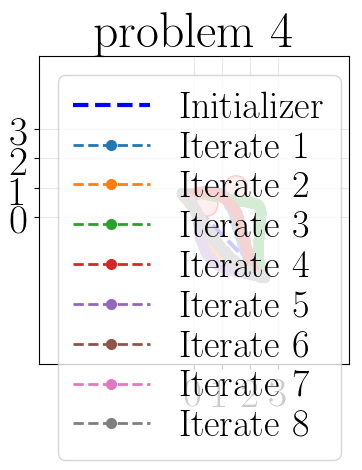

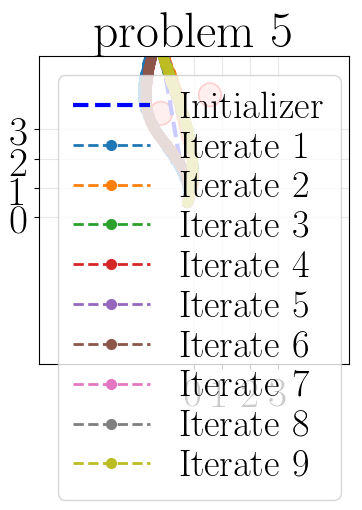

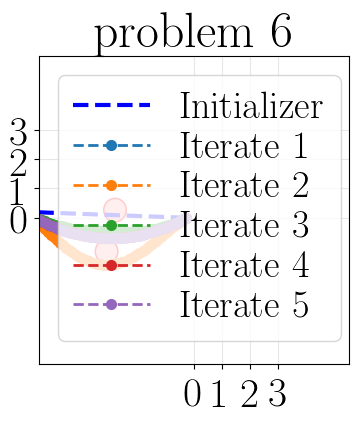

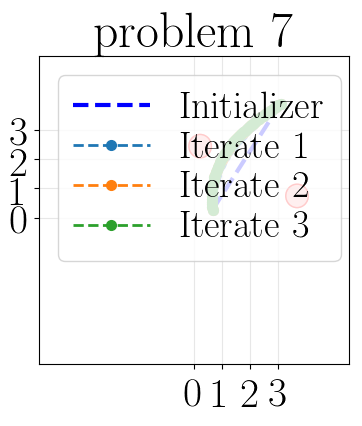

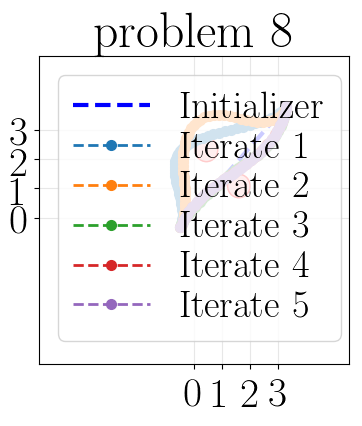

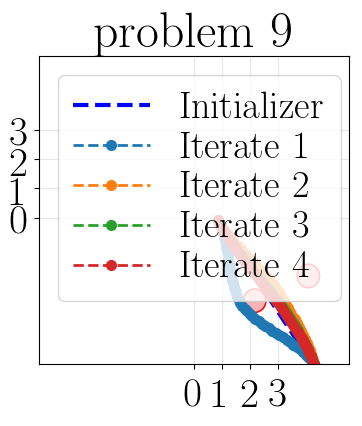

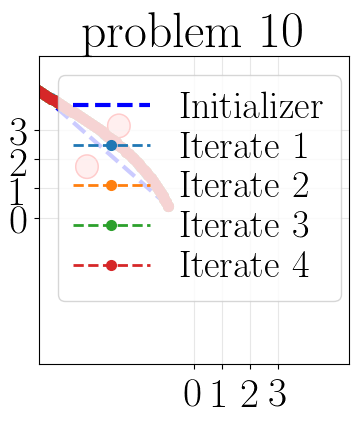

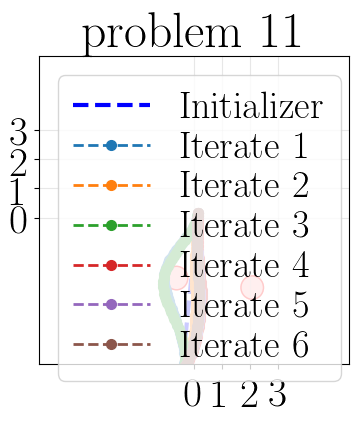

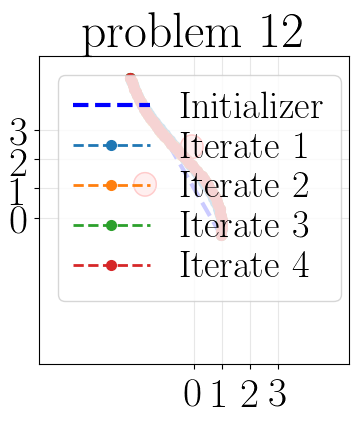

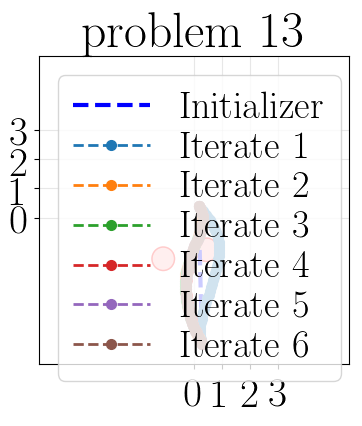

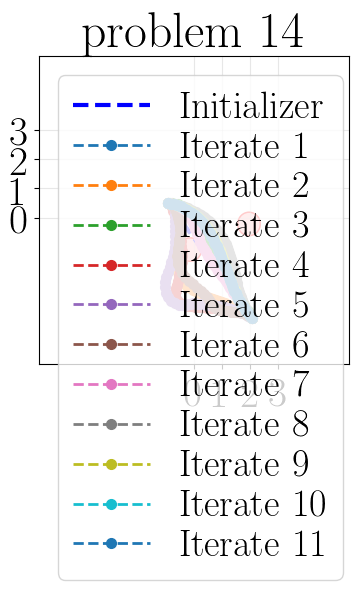

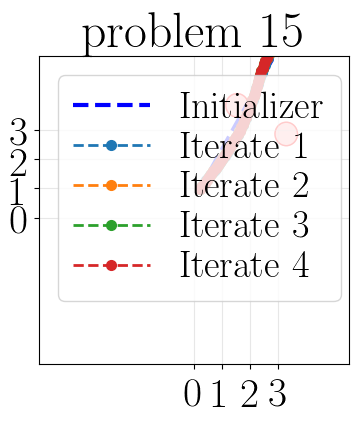

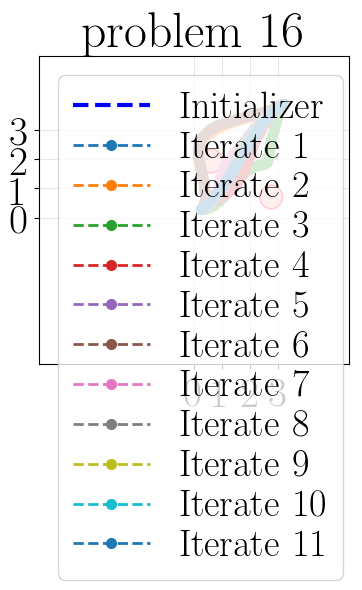

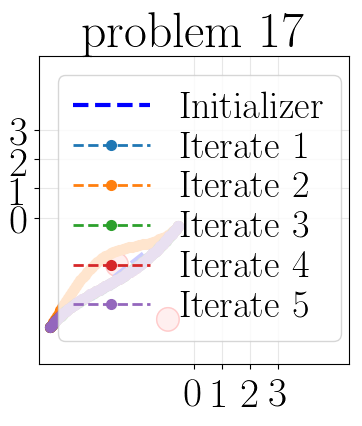

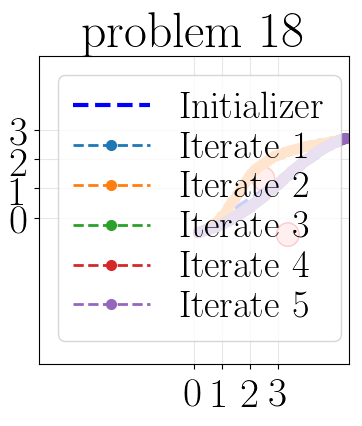

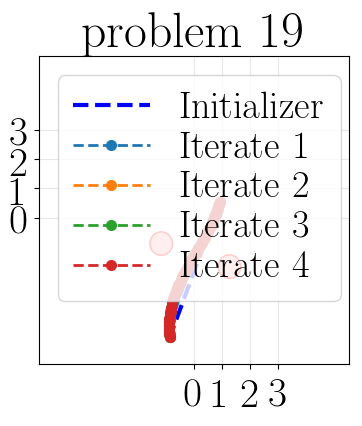

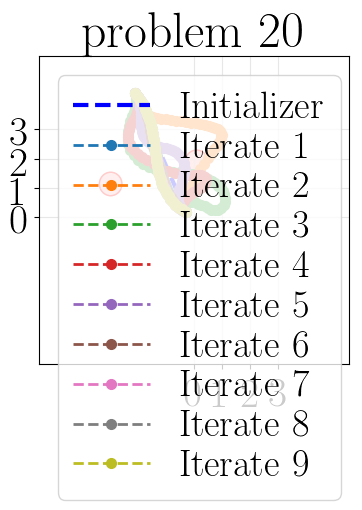

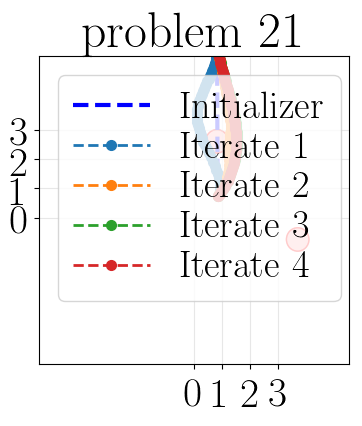

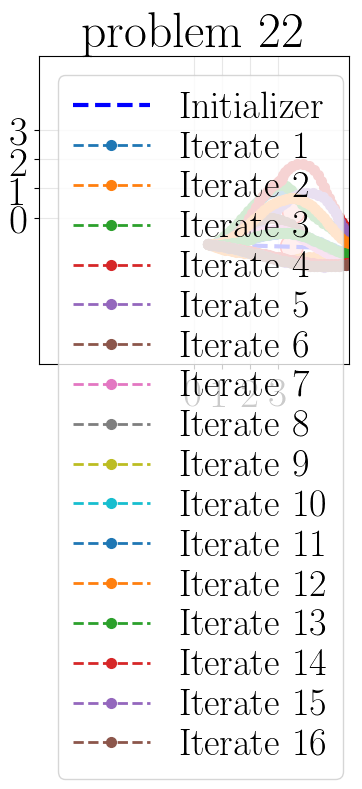

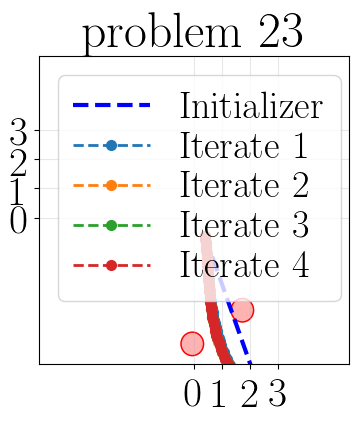

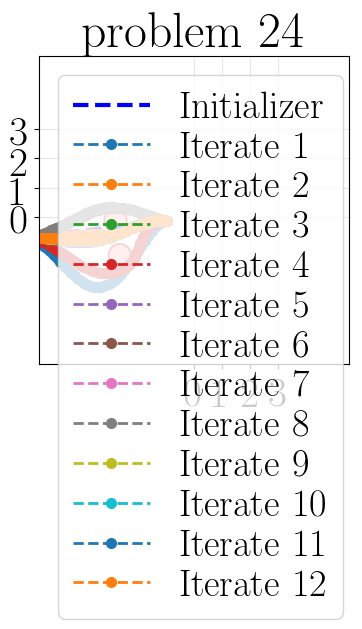

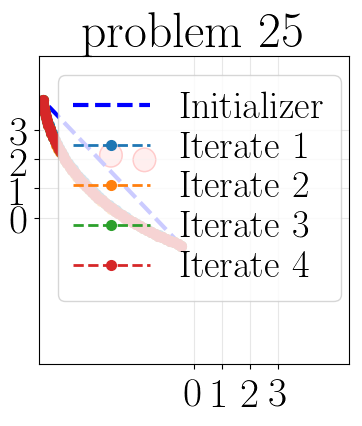

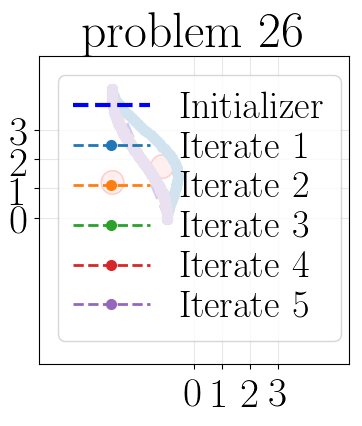

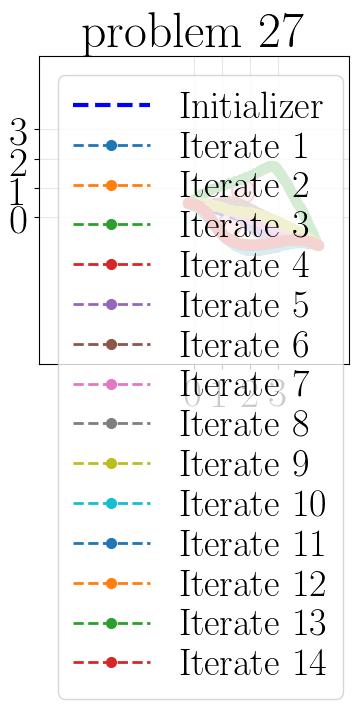

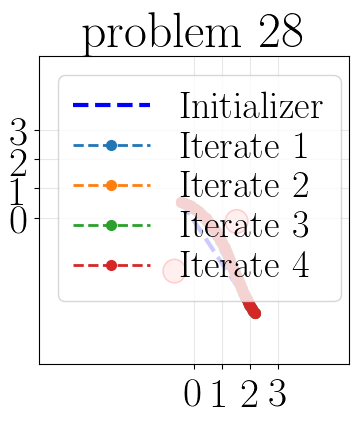

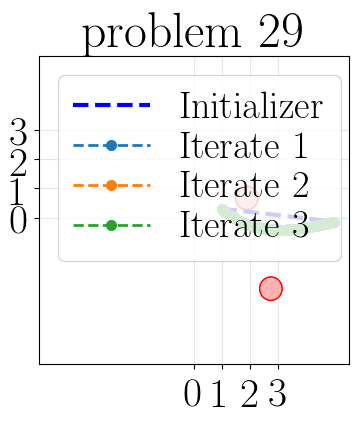

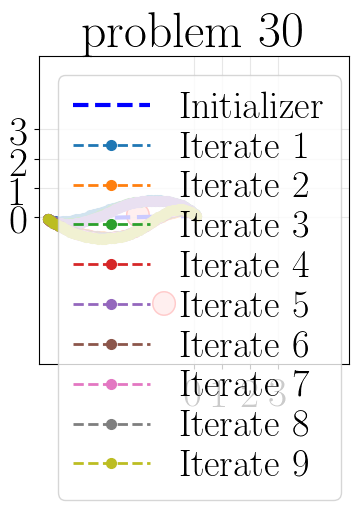

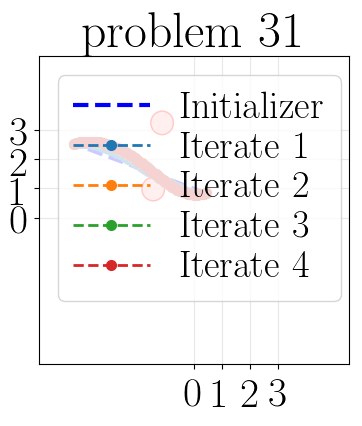

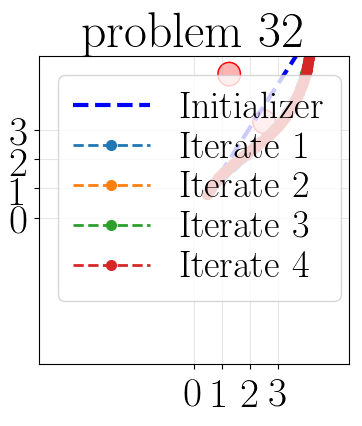

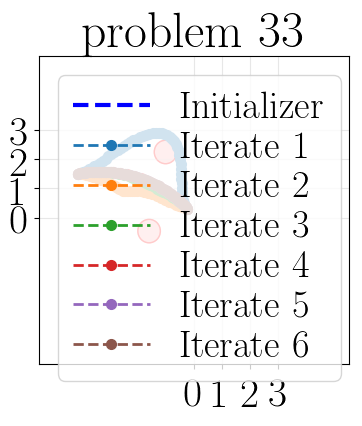

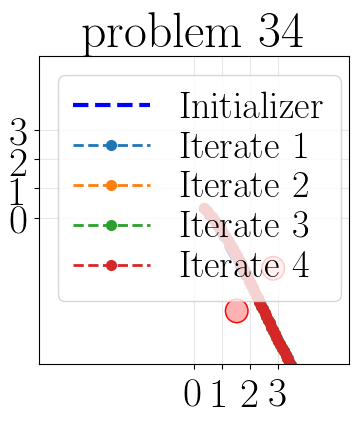

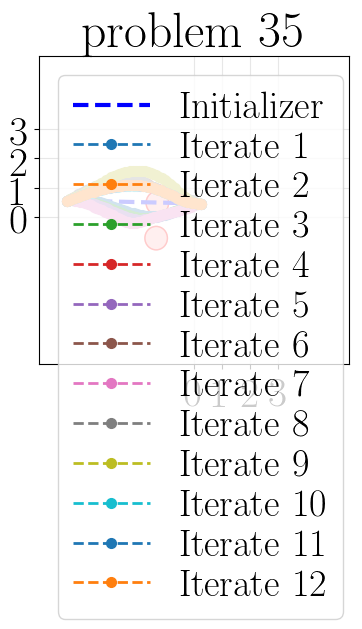

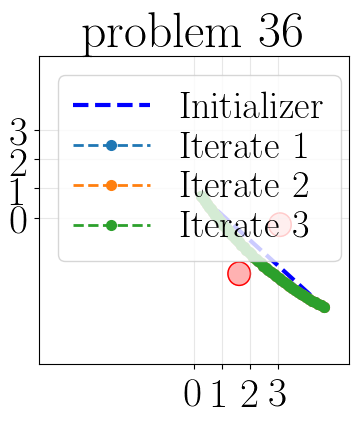

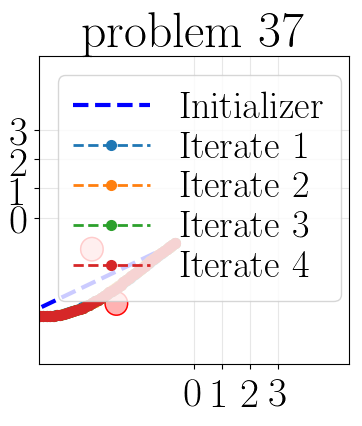

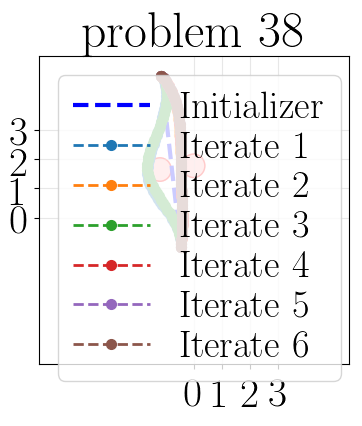

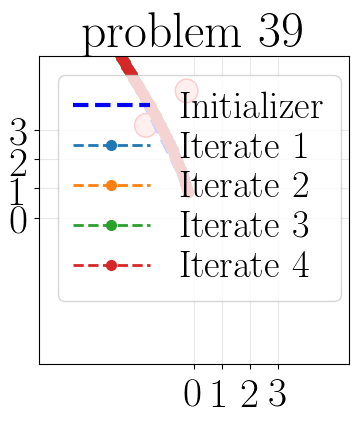

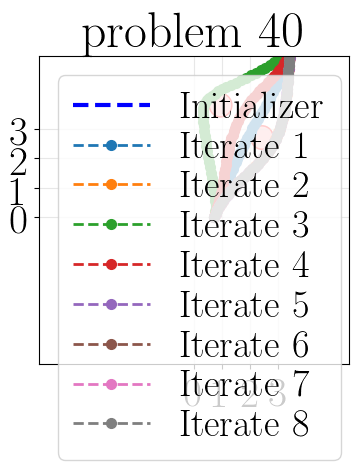

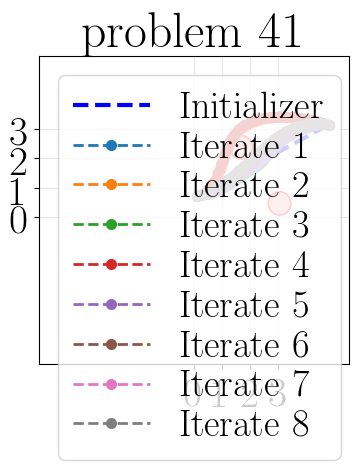

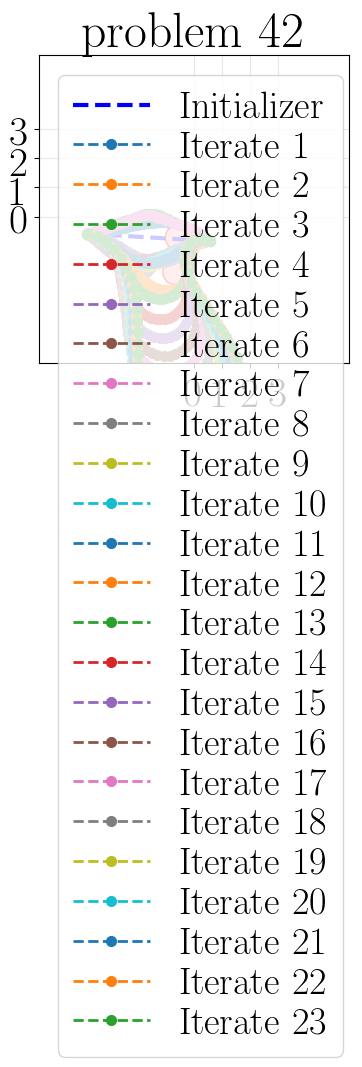

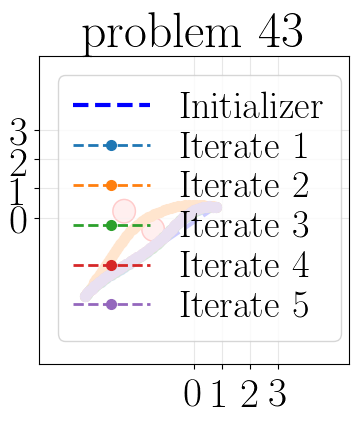

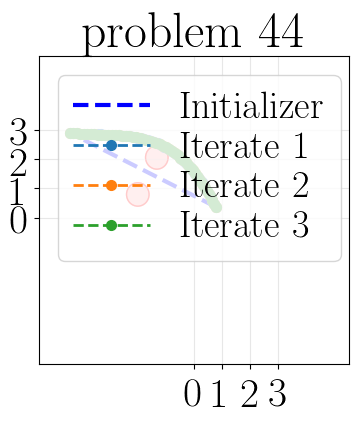

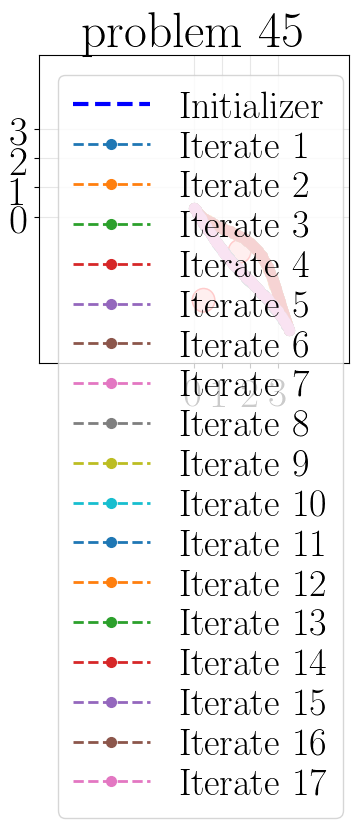

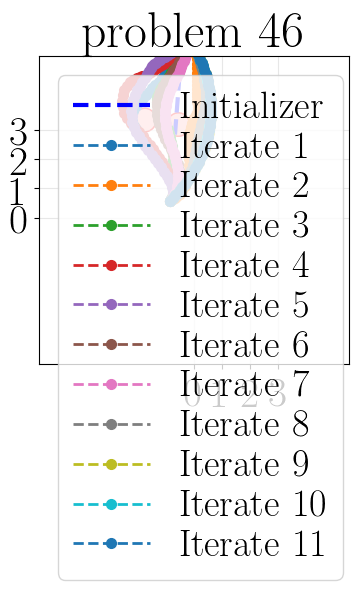

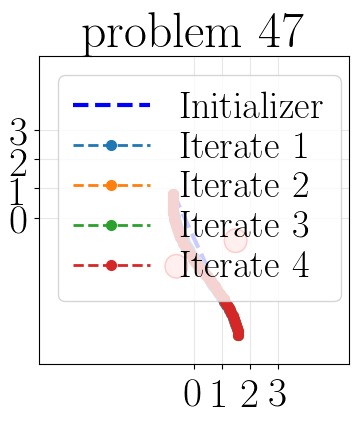

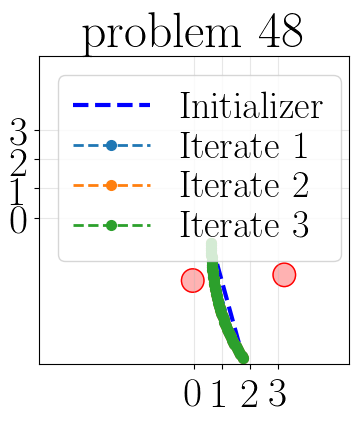

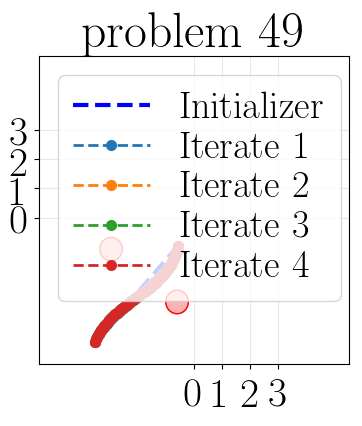

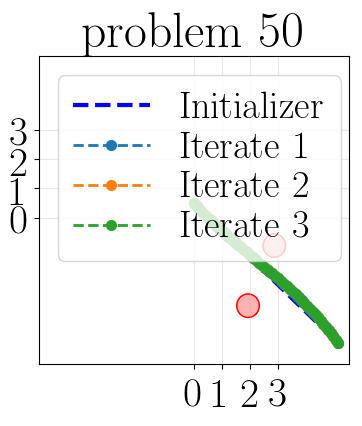

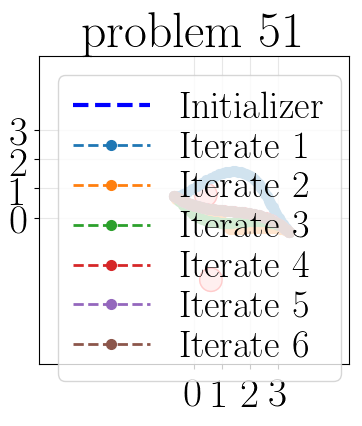

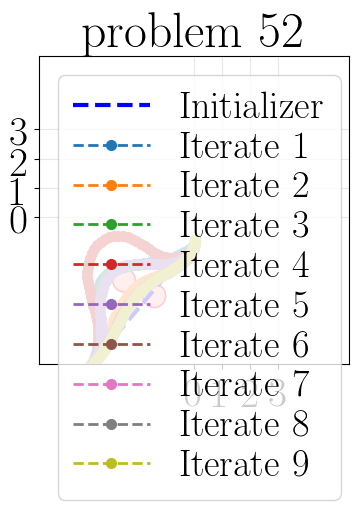

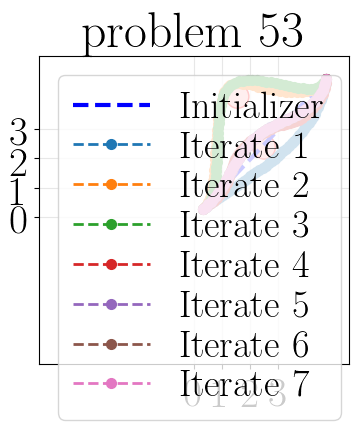

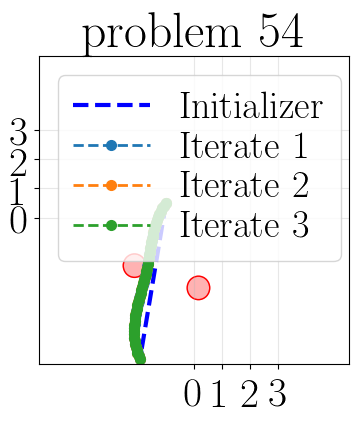

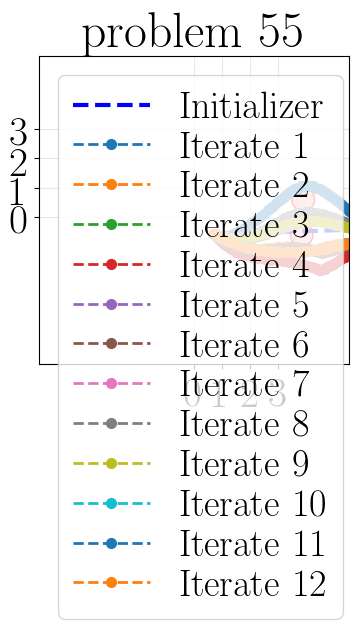

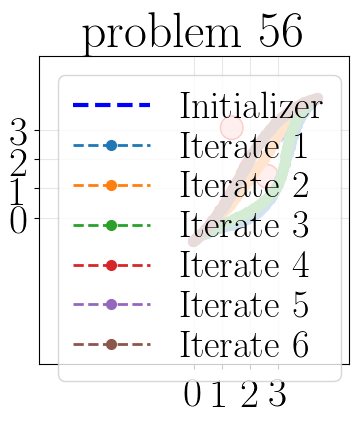

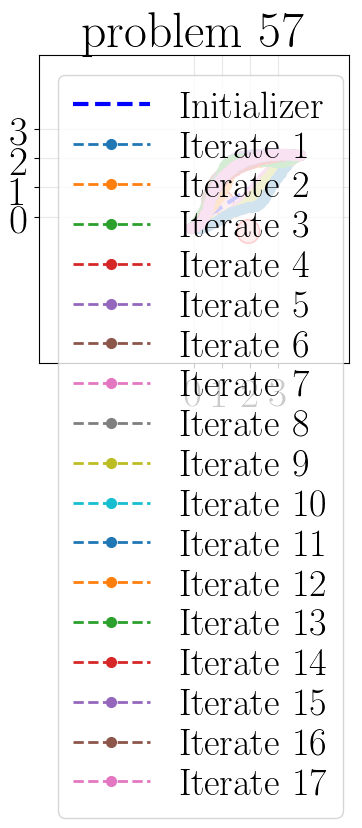

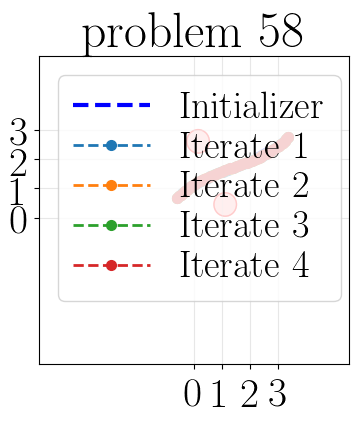

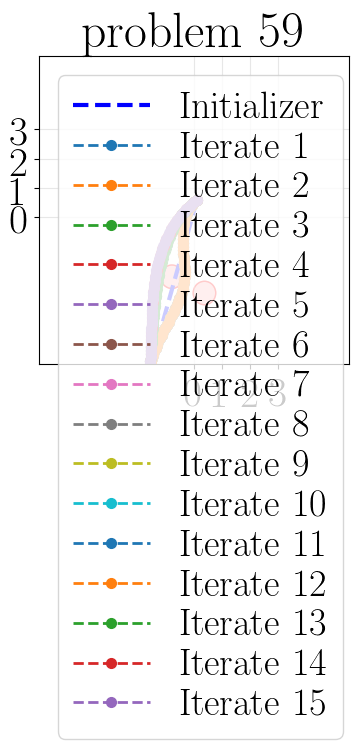

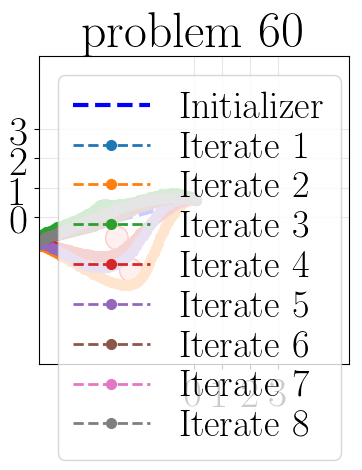

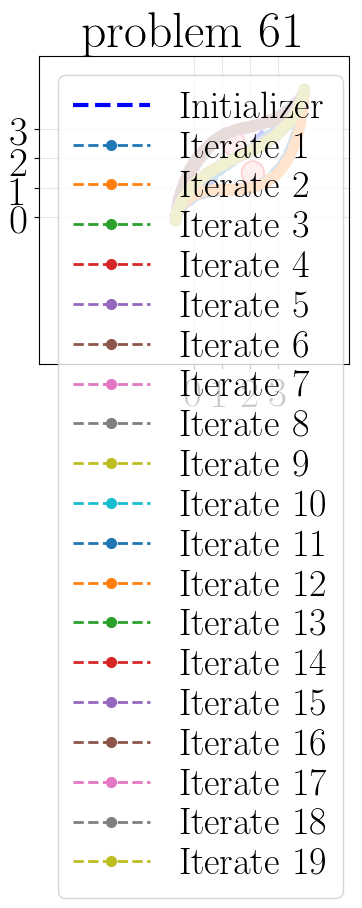

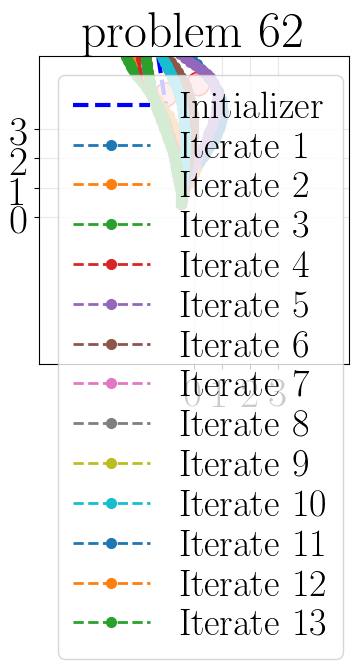

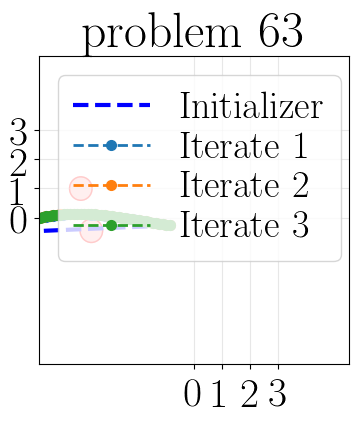

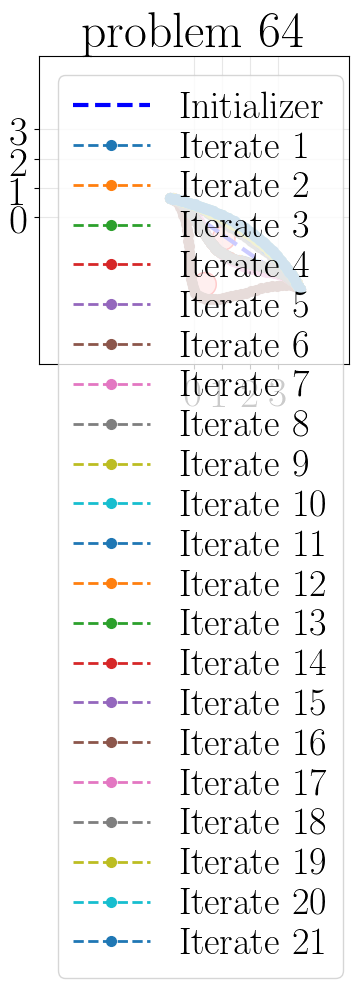

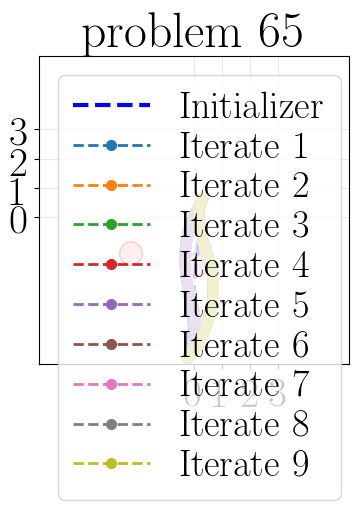

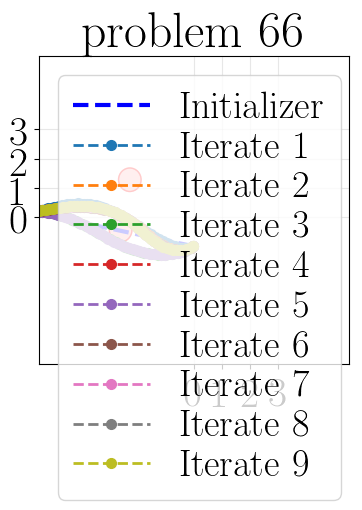

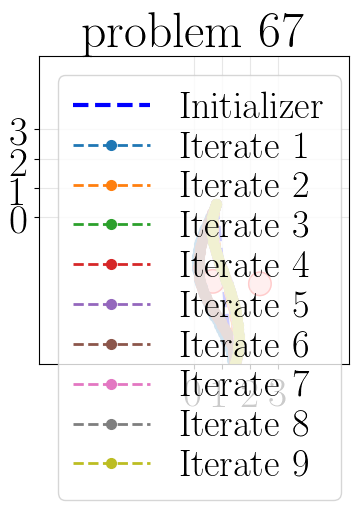

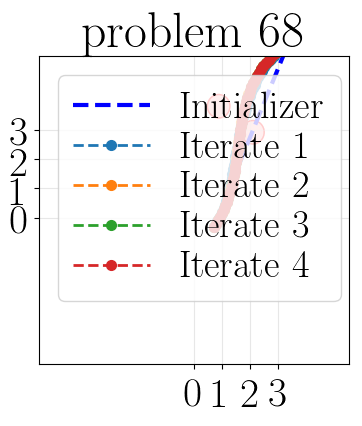

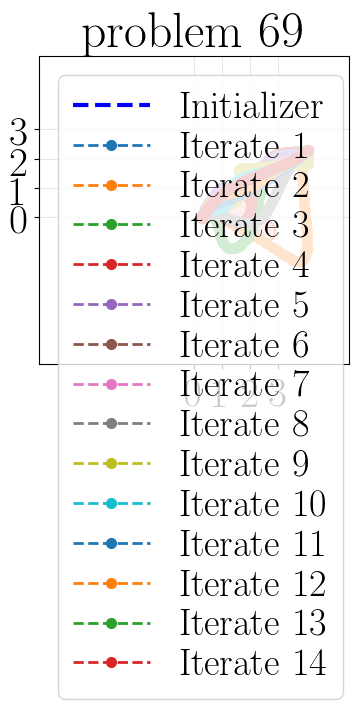

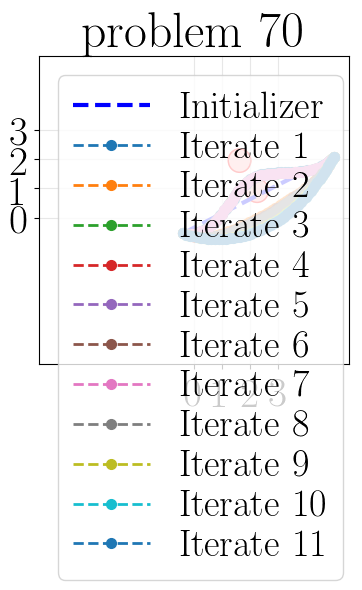

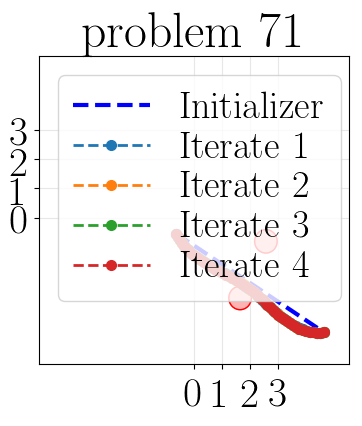

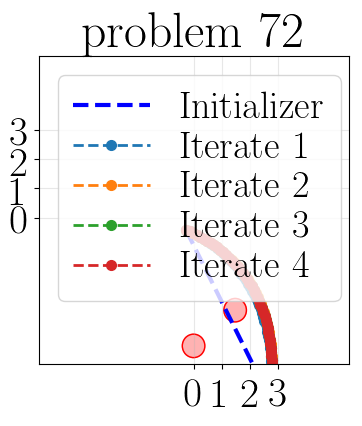

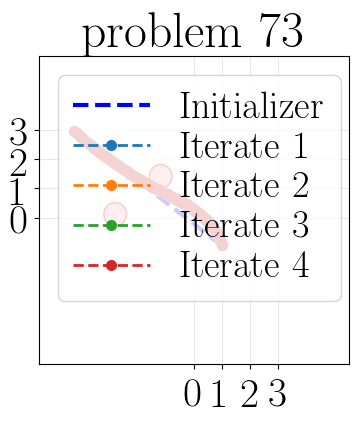

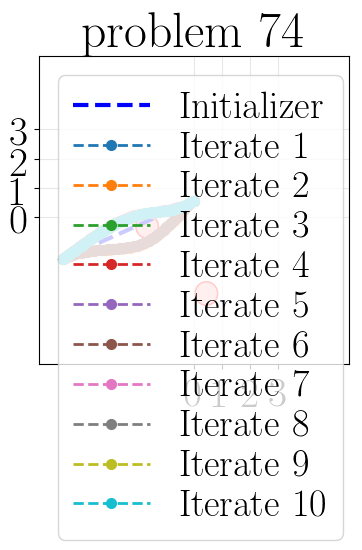

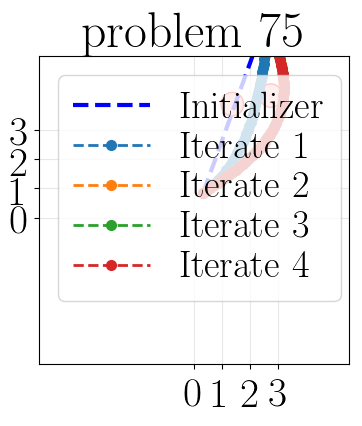

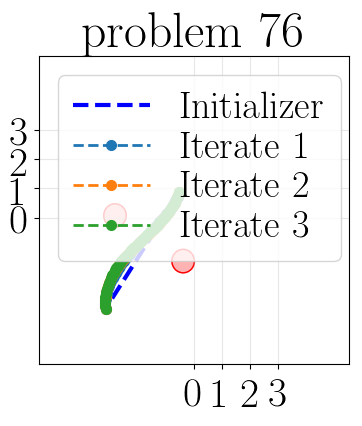

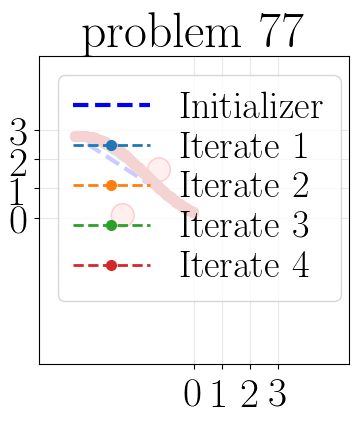

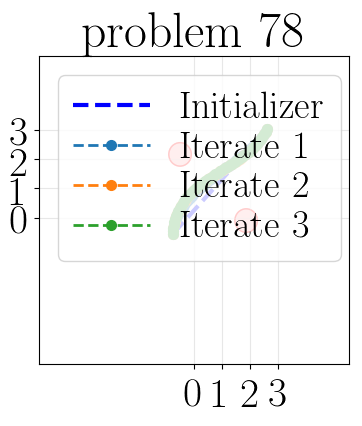

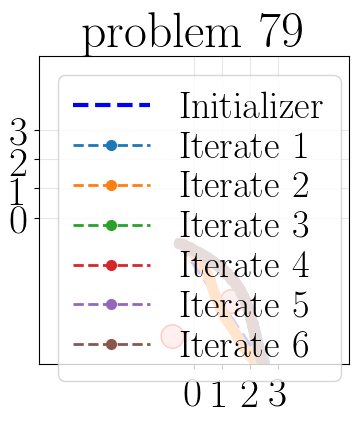

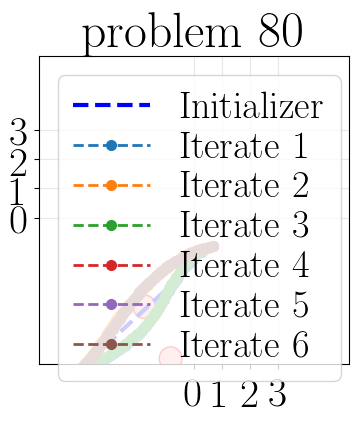

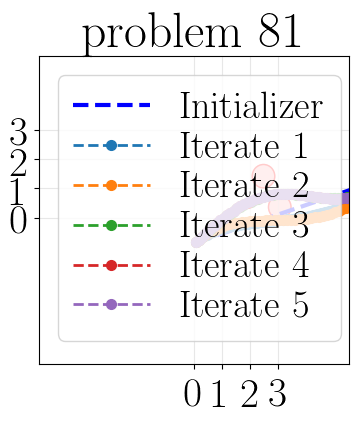

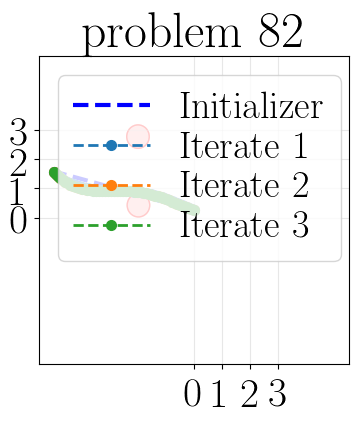

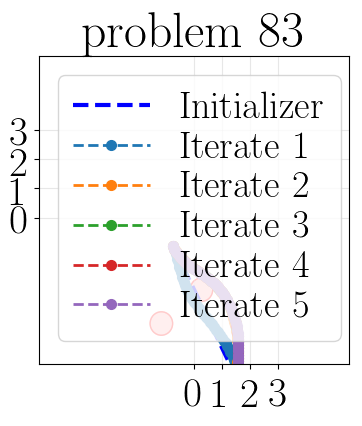

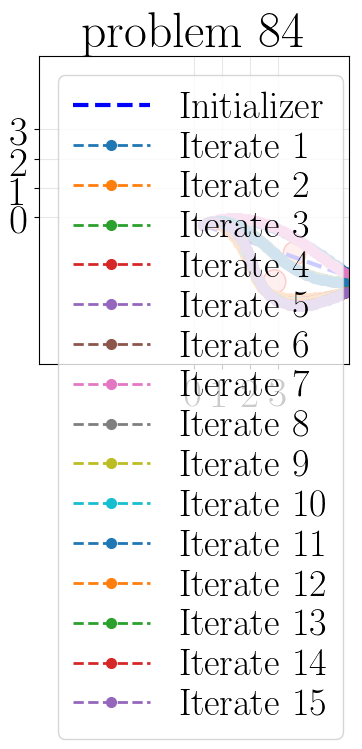

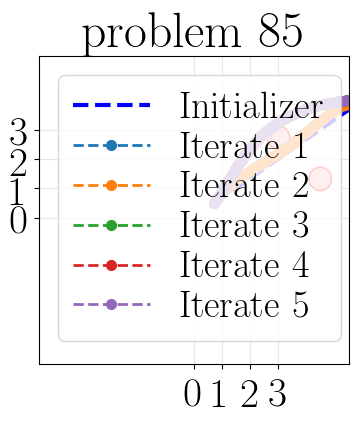

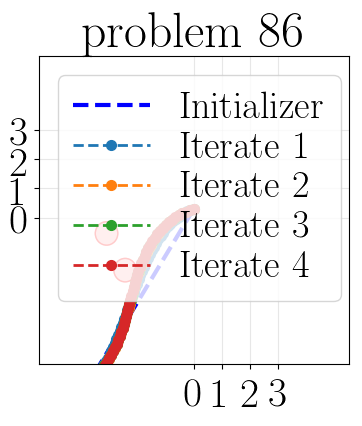

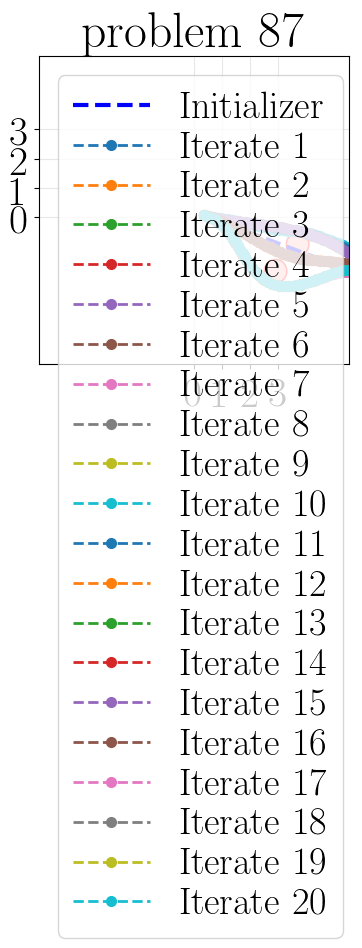

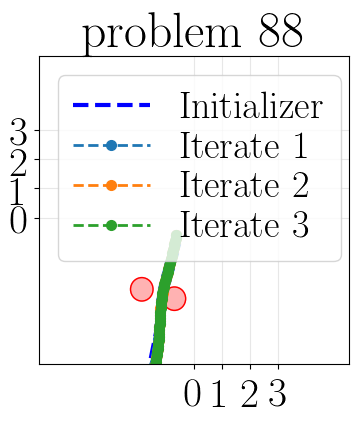

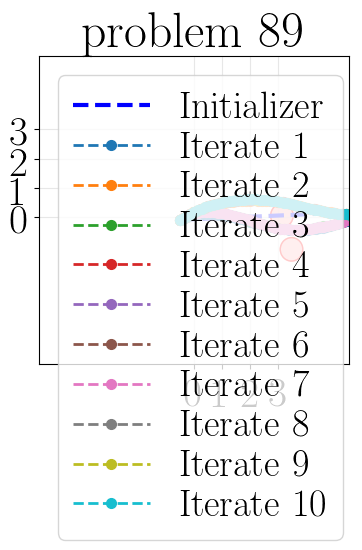

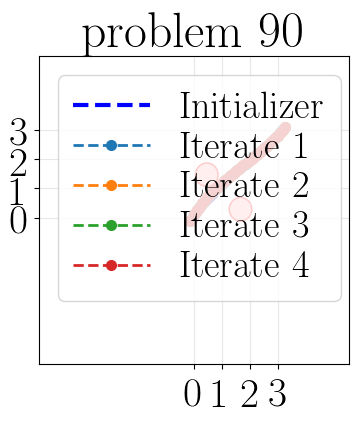

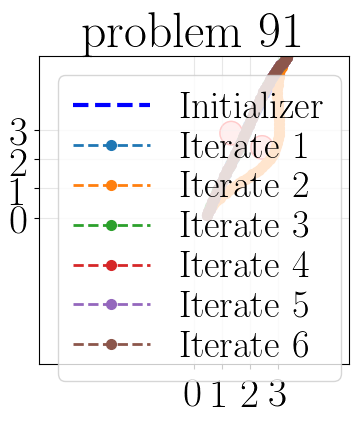

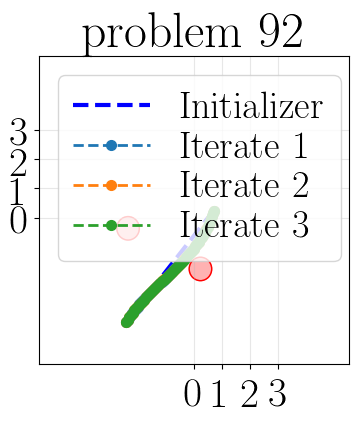

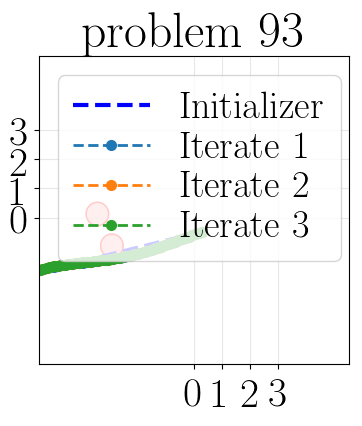

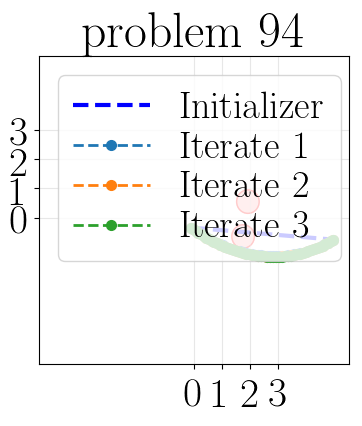

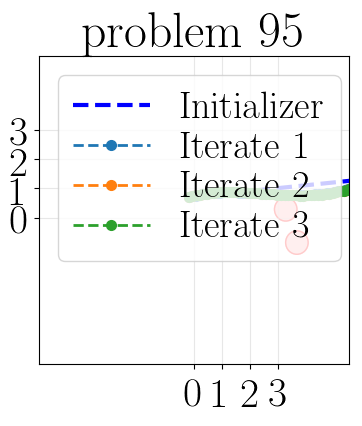

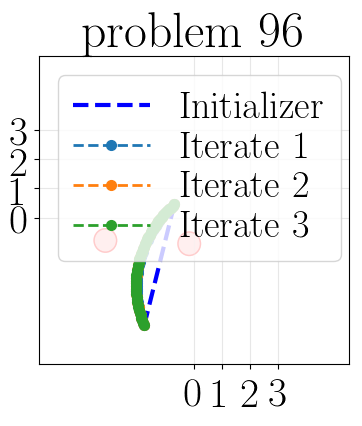

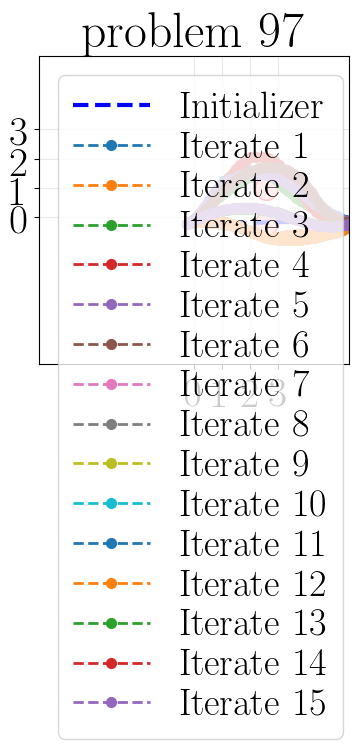

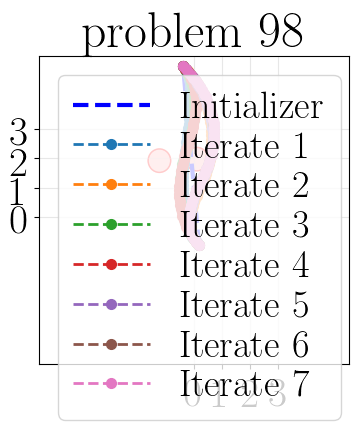

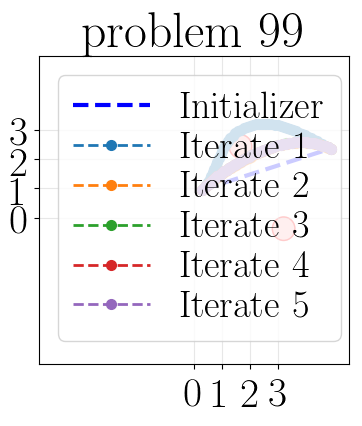

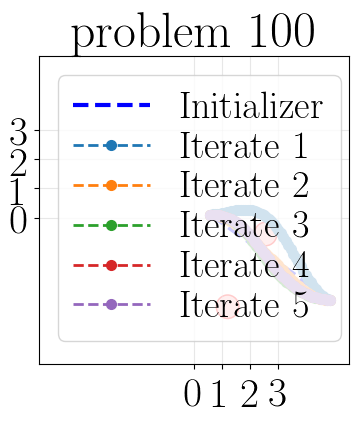

Done Plotting

In [25]:
include("./utils/dubins_plotting.jl")
for i = 1:N_MC
    X_all, U_all = X_MC[i], U_MC[i]
    
    model         = DubinsFree()
    model.x_init  = x0_MC[i,:]
    model.x_final = xf_MC[i,:]
    model.obstacles = obs_MC[i]
    
    Xp,Up   = initialize_trajectory(model,N)
    problem = SCPProblem(model,N,Xp,Up)

    plt_solutions(problem, model, X_all, U_all, B_plot_labels=true,
                 xlims=[-5.5, 5.5], ylims=[-5, 5.5], figsize=[4,4])

    plt.title("problem $i")
end
print("Done Plotting")

In [28]:
# include("./utils/dubins_plotting.jl")
# i = 62
# X_all, U_all = X_MC[i], U_MC[i]
# println("Problem i=$i, success=$(succ_MC[i]), tf=$(X_all[end][end,end])")

# model         = DubinsFree()
# model.x_init  = x0_MC[i,:]
# model.x_final = xf_MC[i,:]
# model.obstacles = obs_MC[i]

# Xp,Up   = initialize_trajectory(model,N)
# problem = SCPProblem(model,N,Xp,Up)

# plt_solutions(problem, model, X_all, U_all, B_plot_labels=true,
#               xlims=[-5.6, 1.7], ylims=[-0.0, 8], figsize=[4,4])

# plt.title("problem $i")
# print("Done Plotting")

## Save data

In [27]:
using JLD

B_save_data = false

if B_save_data
    fn = "./results/dubins/free_tf/"
    if model.B_free_final_angle
        fn = string(fn, "free_final_theta/")

    else
        fn = string(fn, "fixed_final_theta/")

    end
    save(string(fn, "SCP_only.jld"), 
                        "X_MC", X_MC_scpOnly, 
                        "U_MC", U_MC_scpOnly, 
                        "P0_MC", P0_MC_scpOnly, 
                        "succ_MC", succ_MC_scpOnly, 
                        "it_MC", it_MC_scpOnly, 
                        "tr_sat_MC", tr_sat_MC_scpOnly, 
                        "times_MC", times_MC_scpOnly
        )

    save(string(fn, "SCP_shooting.jld"), 
                        "X_MC", X_MC_shooting, 
                        "U_MC", U_MC_shooting, 
                        "P0_MC", P0_MC_shooting, 
                        "succ_MC", succ_MC_shooting, 
                        "it_MC", it_MC_shooting, 
                        "tr_sat_MC", tr_sat_MC_shooting, 
                        "times_MC", times_MC_shooting
        )
    save(string(fn, "scenarios.jld"), 
                        "x0_MC", x0_MC, 
                        "xf_MC", xf_MC, 
                        "obs_MC", obs_MC, 
                        "tfs", tfs
        )
end